# Lending club case study

###### Problem statement: Identify the loan defaulters

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

1. Read data from csv file

In [3]:
import pandas as pd

loan_df= pd.read_csv("loan.csv",low_memory=True)



C:\Users\LENOVO\anaconda3x\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2.Sanity check: 


In [4]:
loan_df.shape


(39717, 111)

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


3. Identify % of missing values in the dataset

In [6]:
missing_percent=(loan_df.isnull().sum()/len(loan_df)*100)
missing_percent

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

4. Remove the variables which have missing values > 50%

In [7]:
missing_val_df=pd.DataFrame({'field_name':loan_df.columns, 'missing_percent':missing_percent.round(2)})

# 57 columns have more 50% missing values
(missing_val_df['missing_percent'] >= 50).sum()


57

In [8]:
# List out all the 57 columns
missing_val_list=missing_val_df[(missing_val_df['missing_percent'] >= 50)].field_name.tolist()


In [9]:
# Drop all the listed columns
cleansed_loan_df=loan_df.drop(missing_val_list, axis=1)
cleansed_loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


5. Remove unnecessary columns from the dataset

In [10]:
cleansed_loan_df=cleansed_loan_df.drop(['desc', 'member_id', 'id', 'url'], axis=1)
cleansed_loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


6. Remove fields having same values
        

In [11]:
cleansed_loan_df=cleansed_loan_df.drop(['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'], axis=1)

7. Removing unique value fields

In [12]:
cleansed_loan_df=cleansed_loan_df.drop(['emp_title'], axis=1)

In [13]:
cleansed_loan_df.shape

(39717, 40)

8. Dropping months from term

In [14]:
cleansed_loan_df['term']=cleansed_loan_df['term'].str.rstrip('months')

9. Dropping 'years', '+','<','%' from Data

In [15]:
cleansed_loan_df['emp_length']=cleansed_loan_df['emp_length'].str.rstrip('years')

In [16]:
cleansed_loan_df['emp_length']=cleansed_loan_df['emp_length'].str.rstrip('+ ')

In [17]:
cleansed_loan_df['emp_length'].replace({'< 1': '0.5'}, inplace=True)

In [18]:
cleansed_loan_df['revol_util']=cleansed_loan_df['revol_util'].str.rstrip('%')

In [19]:
cleansed_loan_df['int_rate']=cleansed_loan_df['int_rate'].str.rstrip('%')

10. Creating derived variables

In [20]:
cleansed_loan_df['issue_d_month'], cleansed_loan_df['issue_d_year'] = cleansed_loan_df['issue_d'].str.split('-').str


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2936/3658900224.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  cleansed_loan_df['issue_d_month'], cleansed_loan_df['issue_d_year'] = cleansed_loan_df['issue_d'].str.split('-').str


In [21]:

cleansed_loan_df['issue_d_year'] = '20' + cleansed_loan_df['issue_d_year']


In [22]:

cleansed_loan_df['last_credit_pull_d_month'], cleansed_loan_df['last_credit_pull_d_year'] = cleansed_loan_df[
    'last_credit_pull_d'].str.split('-').str


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2936/1895420675.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  cleansed_loan_df['last_credit_pull_d_month'], cleansed_loan_df['last_credit_pull_d_year'] = cleansed_loan_df[


In [23]:

cleansed_loan_df['last_pymnt_d_month'], cleansed_loan_df['last_pymnt_d_year'] = cleansed_loan_df[
    'last_pymnt_d'].str.split('-').str


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2936/694952724.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  cleansed_loan_df['last_pymnt_d_month'], cleansed_loan_df['last_pymnt_d_year'] = cleansed_loan_df[


In [24]:

cleansed_loan_df['earliest_cr_line_month'], cleansed_loan_df['earliest_cr_line_year'] = cleansed_loan_df[
    'earliest_cr_line'].str.split('-').str

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2936/184444014.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  cleansed_loan_df['earliest_cr_line_month'], cleansed_loan_df['earliest_cr_line_year'] = cleansed_loan_df[


In [25]:
import numpy as np
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate', 'emp_length',
          'revol_util']
cleansed_loan_df[columns] = cleansed_loan_df[columns].astype(np.float64)

In [26]:
# Creating a profit and loss column
cleansed_loan_df['PnL']=(
    cleansed_loan_df['total_pymnt']-cleansed_loan_df['funded_amnt']
)*100/cleansed_loan_df['funded_amnt']

In [27]:
# Creating a loan_inc_rati column
cleansed_loan_df['loan_inc_ratio'
                         ] = cleansed_loan_df.funded_amnt*100/cleansed_loan_df.annual_inc

In [28]:
columns = ['total_acc', 'term', 'issue_d_year']
cleansed_loan_df[columns] = cleansed_loan_df[columns].astype(np.int64)

##### Univariate Analysis

In [29]:
## Removing current loan status as it's not needed in the analysis
cleansed_loan_df=cleansed_loan_df[cleansed_loan_df.loan_status != 'Current']
df=cleansed_loan_df



In [30]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

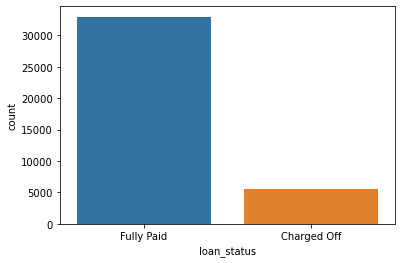

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x= df["loan_status"])
plt.show()

Most of the loans are Fully Paid.
About 14% of loan are having status as defaulters

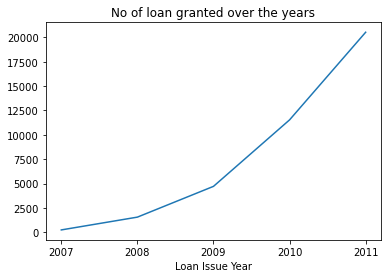

In [32]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

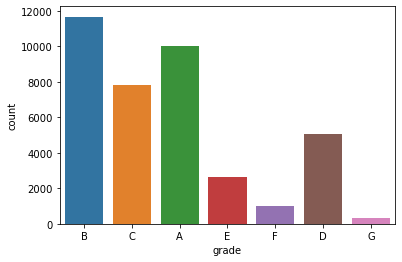

In [33]:
sns.countplot(x= df["grade"])
plt.show()

Most of the loans are A and B grade loans

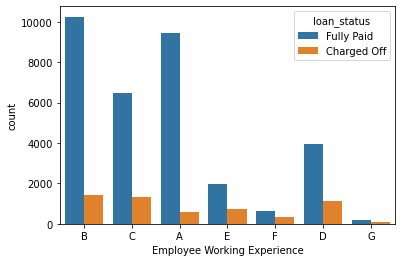

In [34]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

Low grade loans are riskier.

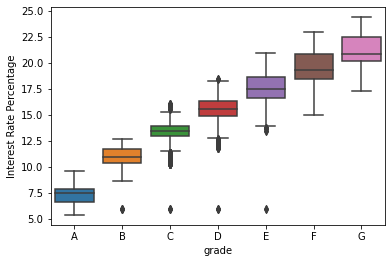

In [35]:
sns.boxplot(y='int_rate', x='grade', order=['A','B','C','D', 'E', 'F', 'G'], data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

Loans with lower grades have higher interest rates thus, higher chances of defaulter.

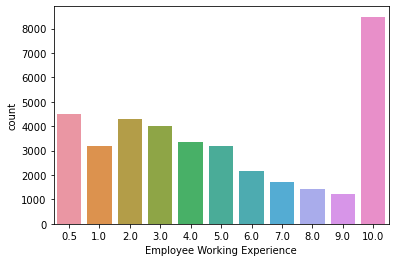

In [36]:
sns.countplot(x='emp_length', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

Most of the loans are taken by employees with Working Experience >=10

Segmented univariate Analysis

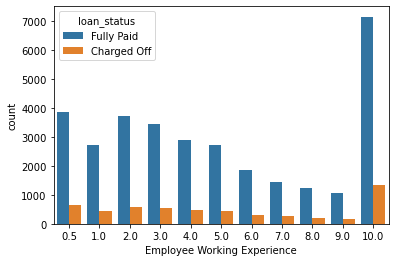

In [37]:
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

C:\Users\LENOVO\anaconda3x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


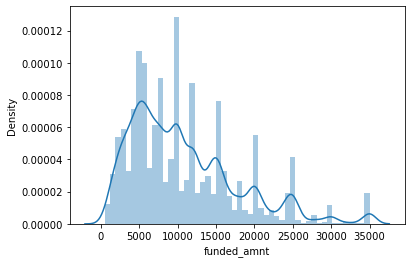

In [38]:
sns.distplot(df['funded_amnt'])
plt.show()

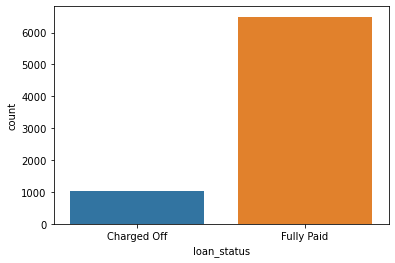

In [39]:
sns.countplot(x= "loan_status", data=df[df['funded_amnt']<5000])
plt.show()

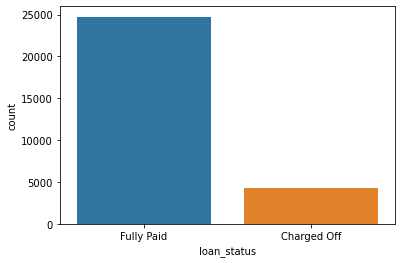

In [40]:
sns.countplot(x= "loan_status", data=df[df['funded_amnt']>5000])
plt.show()

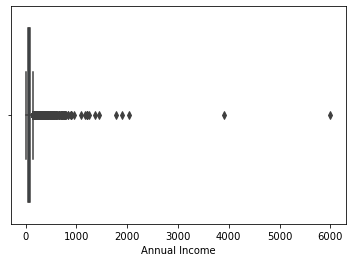

In [41]:
sns.boxplot(x=df['annual_inc']/1000)
plt.xlabel('Annual Income')
plt.show()

C:\Users\LENOVO\anaconda3x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


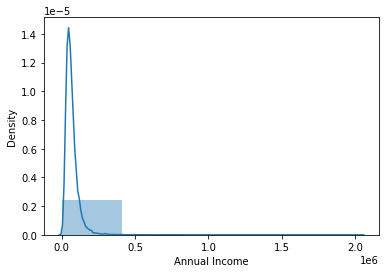

In [42]:
sns.distplot(df[df['annual_inc']/1000 < 3000]['annual_inc'], bins=5)
plt.xlabel('Annual Income')
plt.show()

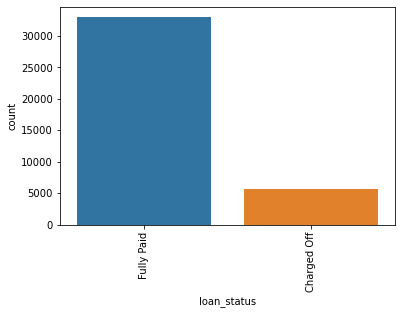

In [48]:
sns.countplot(x="loan_status", data=df[(df['annual_inc']/1000)<3000])
plt.xticks(rotation=90)
plt.show()


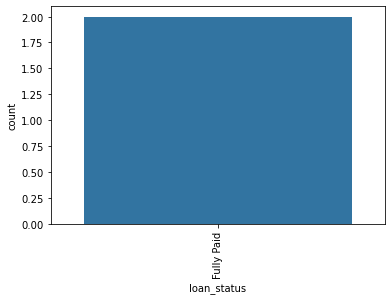

In [49]:
sns.countplot(x="loan_status", data=df[(df['annual_inc']/1000)>3000])
plt.xticks(rotation=90)
plt.show()

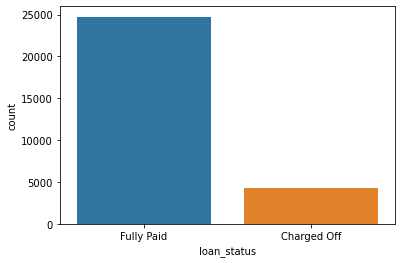

In [44]:
sns.countplot(x= "loan_status", data=df[df['funded_amnt']>5000])
plt.show()

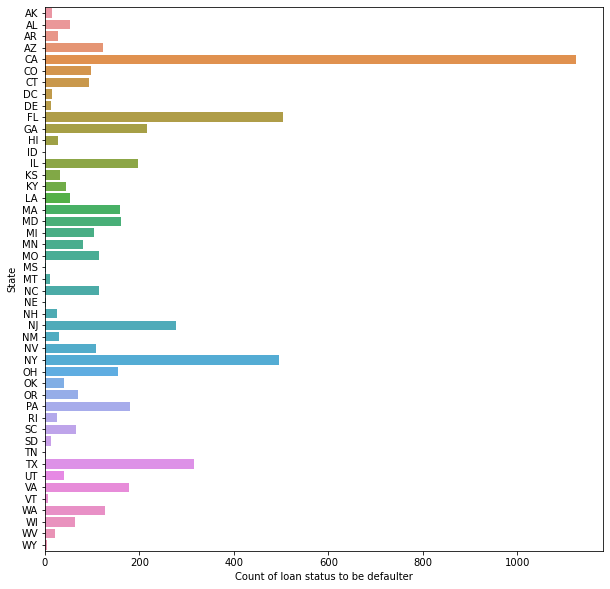

In [50]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

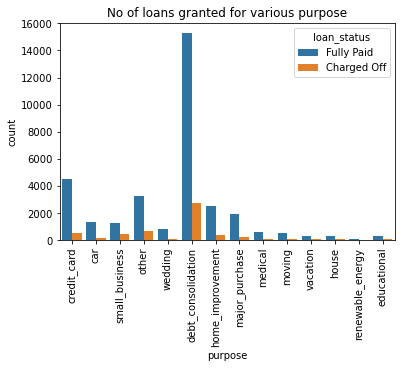

In [51]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

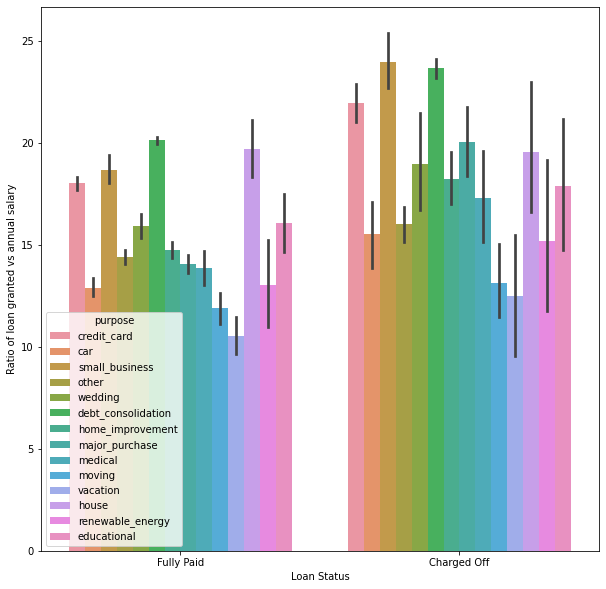

In [52]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

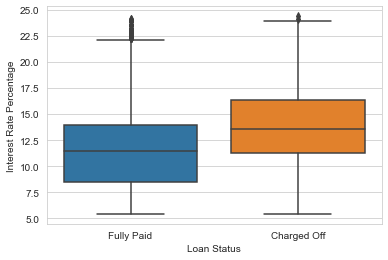

In [217]:
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

For the charged off loans, inerest rate seems high

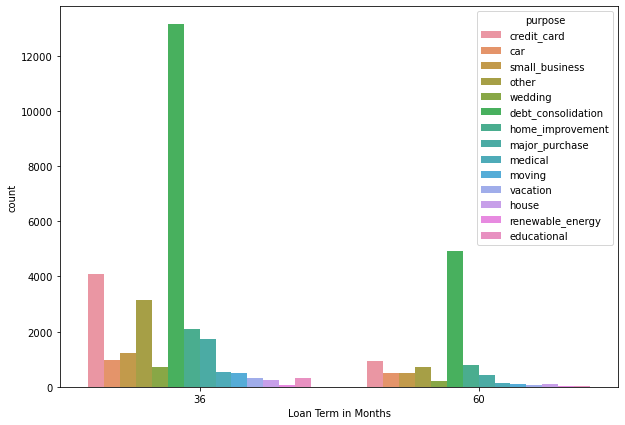

In [54]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

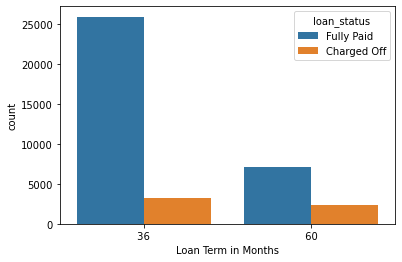

In [180]:
sns.countplot( x="term", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

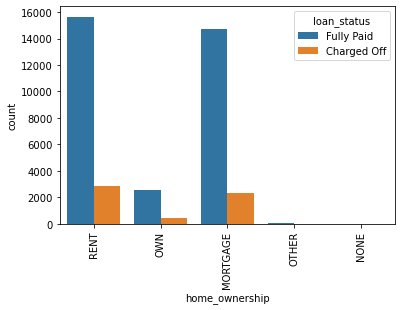

In [55]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

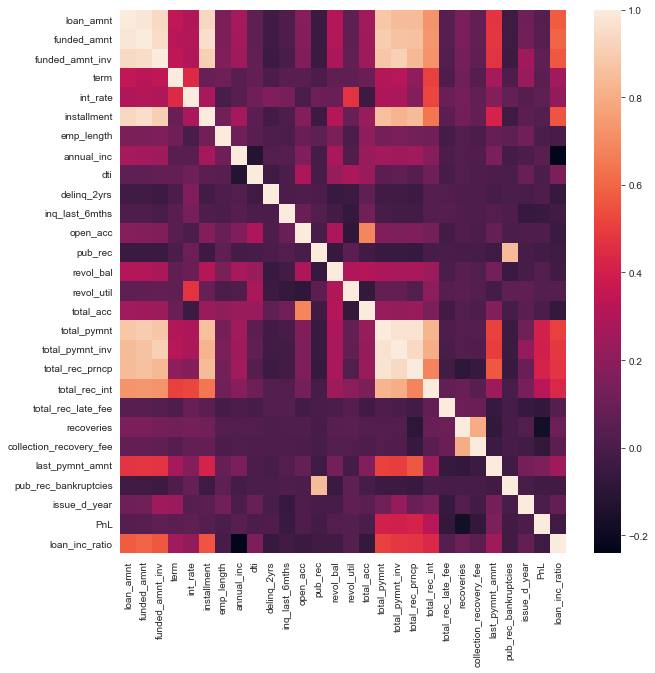

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [60]:
del df['out_prncp'] 

In [61]:
del df['out_prncp_inv']

 Hereby we come to an end of the EDA of the loan data set and finding some of the drivers for loan default.

<b>Minor Impact</b> <br>
.Higher loan amount (above 16K) <br>
•Higher installment amount (above 327) <br>
•Lower annual income (below 37K)<br> 
•Higher debt to income ratio (above 15%) <br>


<b>Heavy impact</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years)<br> 
•Loan grade & sub-grade (D to G) <br>
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2)<br>

<b>Combined impact</b> <br>
•High loan amount & interest rate for lower income group <br>
•High installment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>